## ___ZOMATO DATA STUDY & PREDICTIONS___

Dataset Link: [Kaggle](https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants)

### ___Importing Libraries___

In [1]:
# importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### ___Reading the Data___

In [2]:
# reading the dataset
zomato=pd.read_csv(r"C:\Users\PiyushSin\Downloads\zomato.csv")
zomato.head() 

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
zomato.info() # getting info about data set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [4]:
zomato.shape # 51717 rows and 17 columns

(51717, 17)

In [5]:
zomato.columns # Column List 

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### ___Data Cleaning___

In [6]:
# dropping columns like URL, dish_liked, and Phone (sensitive)
zomato.drop(columns = ['url','phone','dish_liked'], inplace = True) 

In [7]:
# checking for duplicates
zomato.duplicated().sum()
# 43 Restuarants are duplicates

43

In [8]:
# removing duplicates
zomato.drop_duplicates(inplace=True)
zomato.head() 

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [9]:
# Searching for NAs
zomato.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [10]:
# removing any NA
zomato.dropna(how='any',inplace=True)

### ___Data Transformation___

In [11]:
#Reading uninque values from the Rate column
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
# removing NEW, -
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-']

In [13]:
zomato.shape # new shape of the data

(41237, 14)

In [14]:
# Simplifying Ratings 
remove_slash = lambda x: x.replace('/5', '')
zomato.rate = zomato.rate.apply(remove_slash)

In [15]:
zomato['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [16]:
zomato.rate = zomato.rate.str.strip().astype('float')

In [17]:
zomato['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [18]:
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [19]:
# Changing the column names
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})

In [20]:
zomato.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [21]:
# Transforming Features
# 1. Correcting Names
zomato.name = zomato.name.apply(lambda x:x.title())

# 2. Boolean Columns 
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)

# 3. Correcting Cost
#Some Transformations
zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].astype(int) # Changing the cost to Float

In [22]:
zomato.cost.unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199, 1100, 1600,  230,  130, 1700, 1350, 2200, 1400, 2000, 1800,
       1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,   40, 1250,
       3500, 4000, 2400, 2600, 1450,   70, 3200,  240, 6000, 1050, 2300,
       4100,  120, 5000, 3700, 1650, 2700, 4500,   80], dtype=int64)

### ___Final Data___

In [23]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### ___Visualizations___

In [24]:
def countplot(x, data, hue, title, xlabel, ylabel, Lgfig = False):
    if Lgfig is True:
        plt.figure(figsize = (13,6))
    else:
        plt.figure(figsize = (5,4))
    sns.countplot(x = x, data = data, hue = hue, palette= 'Set1')
    plt.xticks(rotation= 90)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

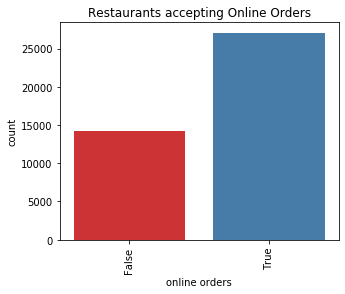

In [25]:
countplot('online_order',zomato, None, 'Restaurants accepting Online Orders','online orders','count')

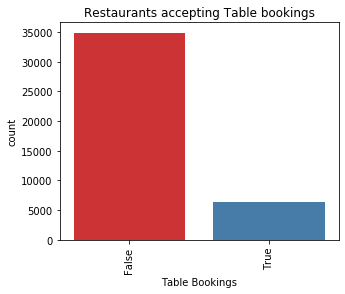

In [26]:
countplot('book_table',zomato, None, 'Restaurants accepting Table bookings','Table Bookings','count')

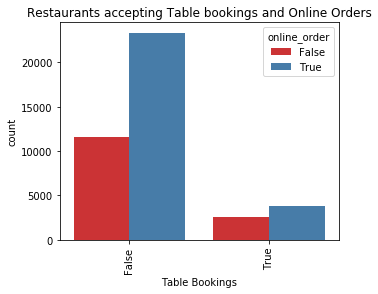

In [27]:
countplot('book_table',zomato, 'online_order', 'Restaurants accepting Table bookings and Online Orders','Table Bookings','count')

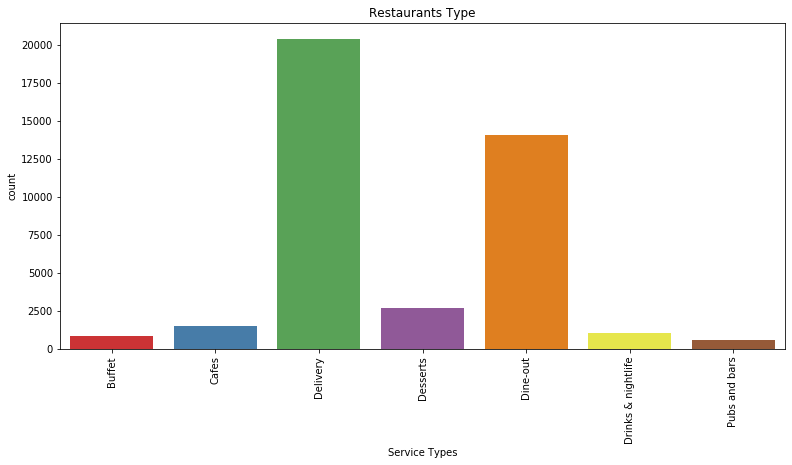

In [28]:
countplot('type',zomato, None, 'Restaurants Type','Service Types','count', Lgfig = True)

In [29]:
zomato.type.value_counts()

Delivery              20431
Dine-out              14062
Desserts               2709
Cafes                  1511
Drinks & nightlife     1045
Buffet                  847
Pubs and bars           632
Name: type, dtype: int64

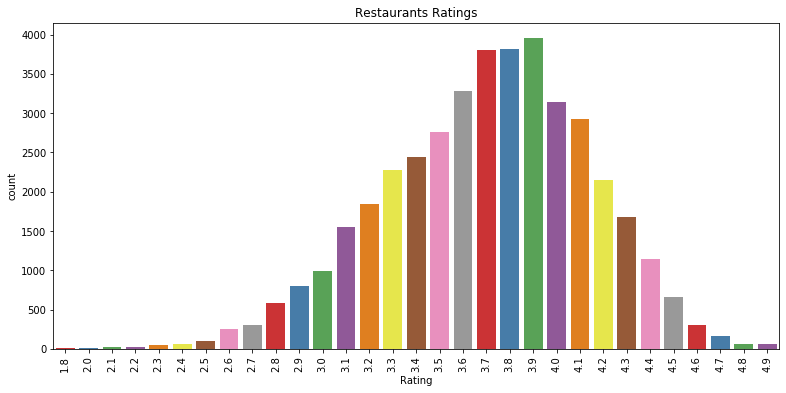

In [30]:
countplot('rate',zomato, None, 'Restaurants Ratings','Rating','count', Lgfig= True)

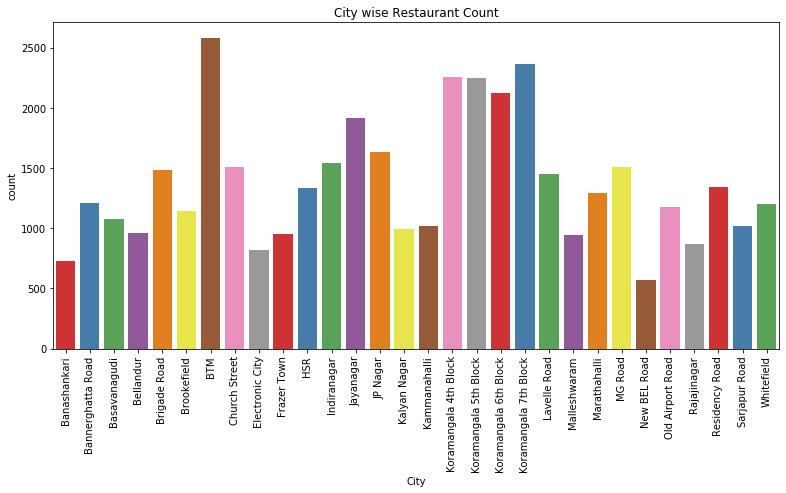

In [31]:
countplot('city',zomato, None, 'City wise Restaurant Count','City','count', Lgfig= True)

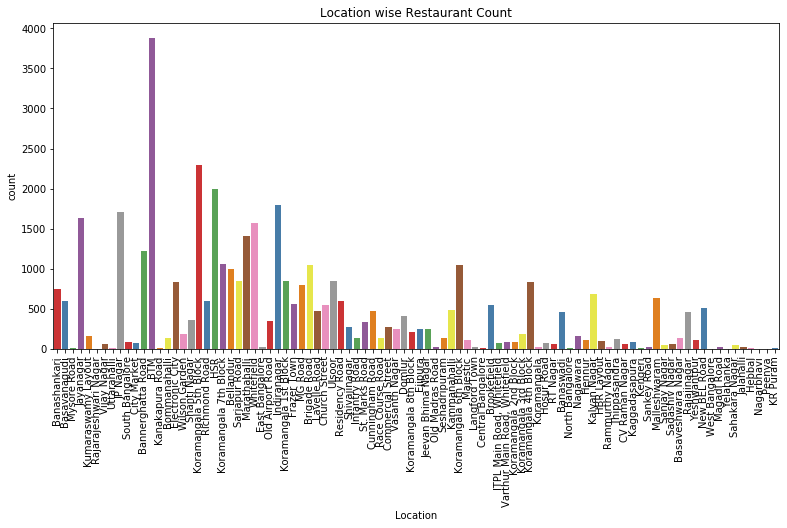

In [32]:
countplot('location',zomato, None, 'Location wise Restaurant Count','Location','count', Lgfig= True)

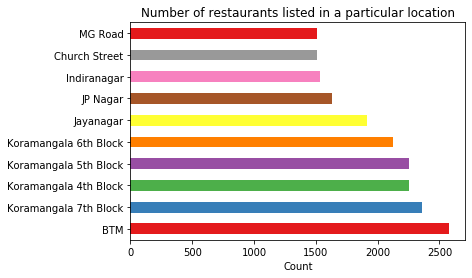

In [33]:
zomato.city.value_counts().nlargest(10).plot(kind = "barh", color = sns.color_palette("Set1"))
plt.title("Number of restaurants listed in a particular location")
plt.xlabel("Count")
plt.show()

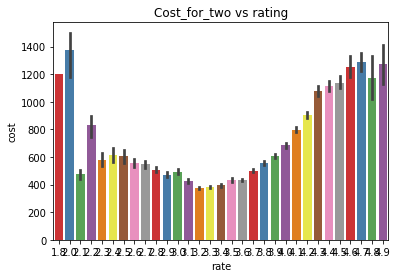

In [34]:
ax = sns.barplot(x='rate', y='cost', data=zomato, palette='Set1')
ax.set_title("Cost_for_two vs rating")
plt.show()

Text(0.5, 0, 'Rating')

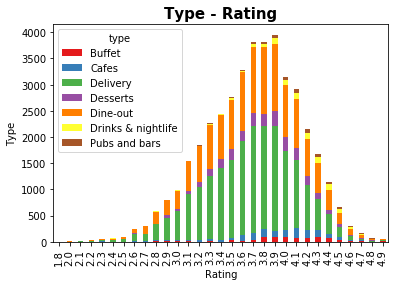

In [35]:
type_plt=pd.crosstab(zomato['rate'],zomato['type'])
type_plt.plot(kind='bar',stacked=True, color = sns.color_palette("Set1"));
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type')
plt.xlabel('Rating')

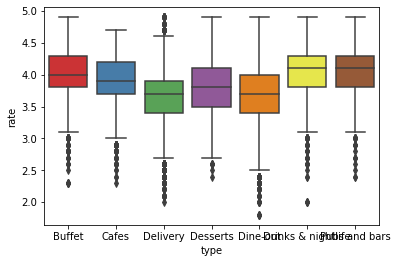

In [36]:
sns.boxplot(x="type", y="rate", data = zomato , palette='Set1')
plt.show()

No handles with labels found to put in legend.


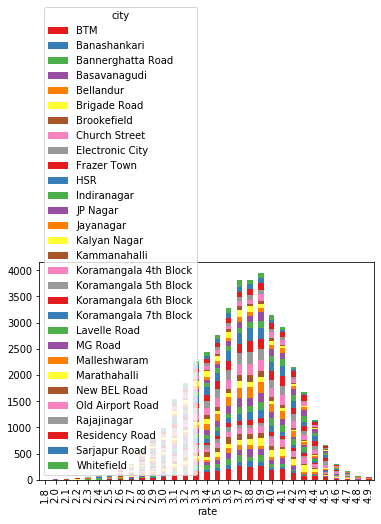

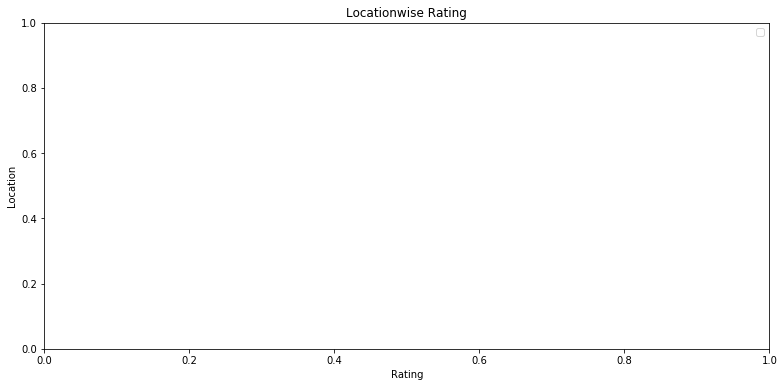

In [37]:
loc_plt=pd.crosstab(zomato['rate'],zomato['city'])
loc_plt.plot(kind='bar',stacked=True, color = sns.color_palette("Set1"));
plt.figure(figsize = (13,6))
plt.title('Locationwise Rating')
plt.ylabel('Location')
plt.xlabel('Rating')
plt.legend();

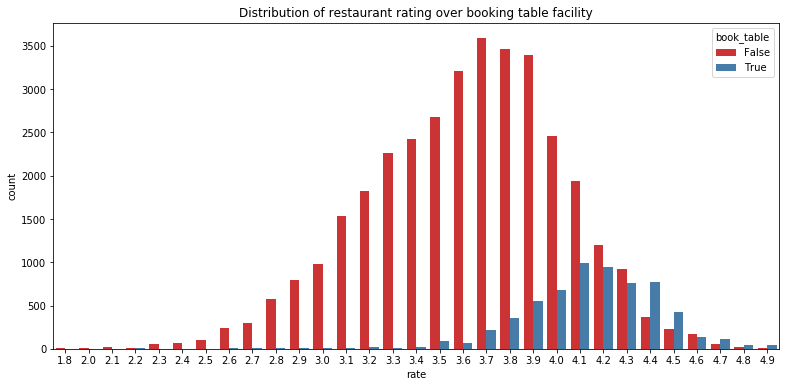

In [38]:
#rating vs booking table
plt.figure(figsize = (13,6))
sns.countplot(hue = zomato["book_table"], palette = "Set1", x = zomato["rate"])
plt.title("Distribution of restaurant rating over booking table facility")
plt.show()

<Figure size 936x432 with 0 Axes>

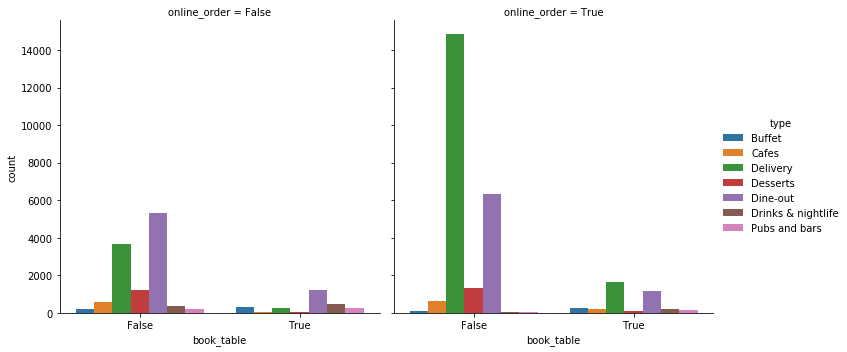

In [39]:
plt.figure(figsize = (13,6))
sns.catplot(x="book_table", hue="type", col="online_order", data=zomato, kind="count")

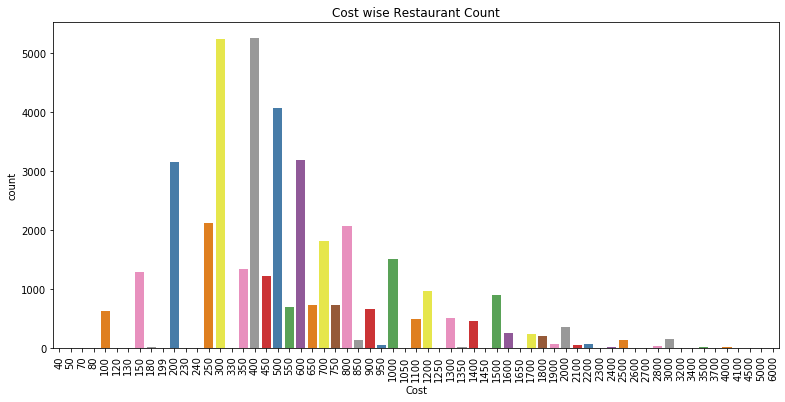

In [40]:
countplot('cost',zomato, None, 'Cost wise Restaurant Count','Cost','count', Lgfig= True)

Text(0.5, 0, 'Number of outlets')

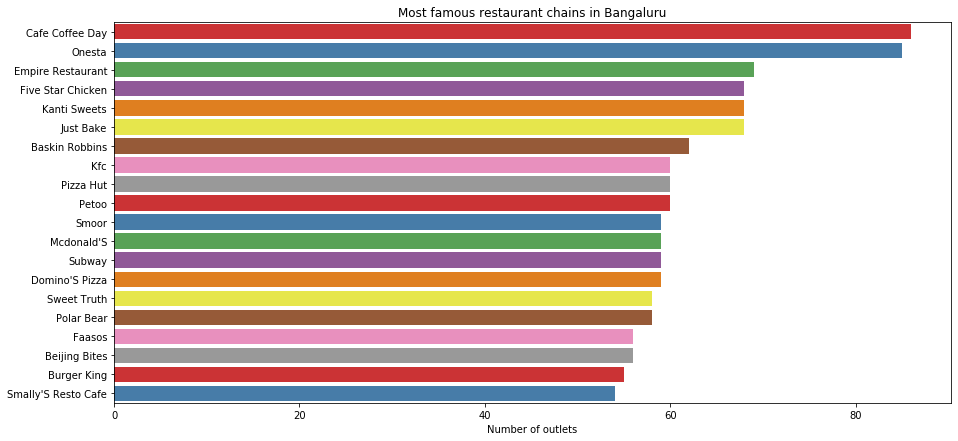

In [41]:
plt.figure(figsize=(15,7))
chains=zomato['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru")
plt.xlabel("Number of outlets")

Text(0, 0.5, 'Density')

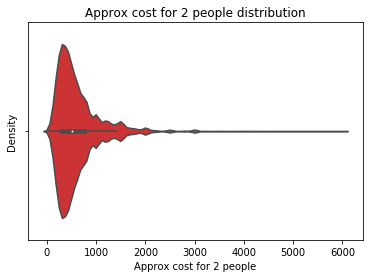

In [42]:
sns.violinplot(zomato.cost, palette='Set1')
plt.title('Approx cost for 2 people distribution')
plt.xlabel('Approx cost for 2 people')
plt.ylabel('Density')

Text(0.5, 0, 'No. of restaurants')

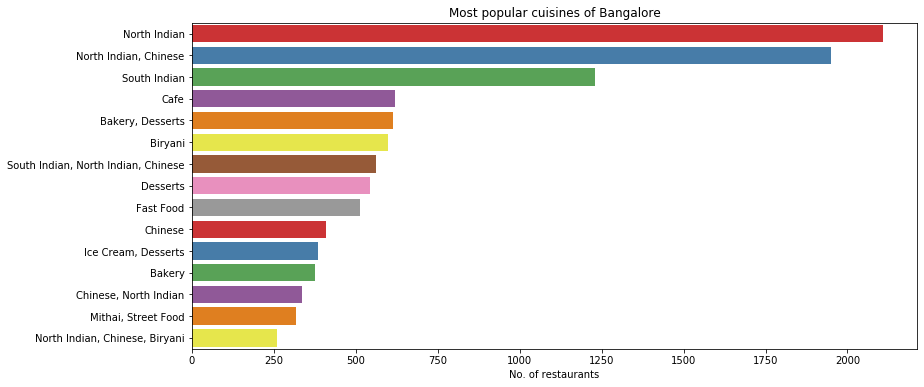

In [43]:
cuisines=zomato['cuisines'].value_counts()[:15]
plt.figure(figsize = (13,6))
sns.barplot(cuisines,cuisines.index,palette='Set1')
plt.title('Most popular cuisines of Bangalore')
plt.xlabel('No. of restaurants')

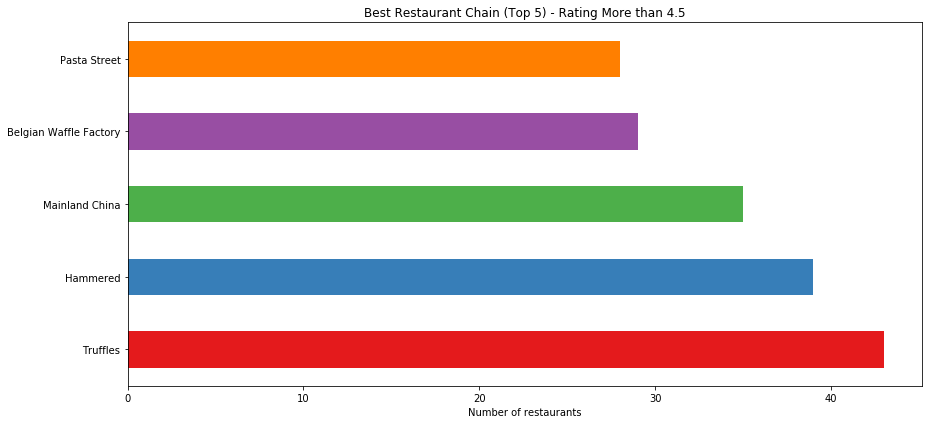

In [44]:
plt.figure(figsize = (13,6))
zomato[zomato['rate']>=4.5]['name'].value_counts().nlargest(5).plot(kind = "barh", color = sns.color_palette("Set1"))
plt.xlabel("Number of restaurants")
plt.title("Best Restaurant Chain (Top 5) - Rating More than 4.5")
plt.tight_layout()

### ___Ratings Prediction___

In [54]:
# import sklearn libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_validate, GridSearchCV, learning_curve
from sklearn.metrics import mean_squared_error, accuracy_score, make_scorer, r2_score

# model libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import lightgbm as lgb
import catboost as cat
import xgboost as xgb

In [55]:
zomato_copy = zomato.copy()

In [56]:
zomato_copy.drop(columns = ['address','name','reviews_list','menu_item','city'], inplace = True)

In [57]:
zomato_copy.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [58]:
zomato_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41237 entries, 0 to 51716
Data columns (total 9 columns):
online_order    41237 non-null bool
book_table      41237 non-null bool
rate            41237 non-null float64
votes           41237 non-null int64
location        41237 non-null object
rest_type       41237 non-null object
cuisines        41237 non-null object
cost            41237 non-null int32
type            41237 non-null object
dtypes: bool(2), float64(1), int32(1), int64(1), object(4)
memory usage: 2.4+ MB


In [59]:
for column in zomato_copy.columns[~zomato_copy.columns.isin(['rate', 'cost', 'votes'])]:
    zomato_copy[column] = zomato_copy[column].factorize()[0]

In [60]:
X = zomato_copy[['online_order','book_table','votes','location','rest_type','cuisines','cost','type']]
y = zomato_copy['rate']

In [61]:
minmax = lambda x: (x - x.min())/(x.max() - x.min())

In [62]:
X_train,X_test,y_train,y_test=train_test_split(minmax(X),y,test_size=.2,random_state=0)

In [63]:
X_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,type
48171,0.0,0.0,0.115435,0.340659,0.000000,0.340237,0.345638,0.666667
45686,1.0,1.0,0.000416,0.296703,0.023256,0.219780,0.077181,0.666667
28345,1.0,1.0,0.001604,0.659341,0.046512,0.004227,0.068792,0.666667
255,0.0,1.0,0.009209,0.021978,0.000000,0.033390,0.060403,0.333333
50410,0.0,1.0,0.000356,0.604396,0.104651,0.406171,0.026846,0.333333


In [102]:
# Building Simple Models
lr = LinearRegression(n_jobs=-1)
svr = SVR(kernel= 'linear')
rf = RandomForestRegressor(random_state=44, n_jobs=-1)
dt = DecisionTreeRegressor(min_samples_leaf=.0001)
rdg = Ridge()
las = Lasso()
gb = GradientBoostingRegressor()
exreg = ExtraTreesRegressor(n_estimators= 100, n_jobs=-1, random_state= 0)
knn = KNeighborsRegressor()
lgb = lgb.LGBMRegressor(random_state=0)
cat = cat.CatBoostRegressor(random_state=0, verbose=0)
xgb = xgb.XGBRegressor(random_state=0)

models = [lr, svr, rf, dt, rdg, las, gb, exreg, knn, lgb, cat, xgb]

for model in models:
    model.fit(X_train, y_train)
    pred_model = model.predict(X_test)
    print(f'The R2 Score of {model.__class__.__name__} is {r2_score(y_test, pred_model)} and rmse score is {np.sqrt(mean_squared_error(y_test, pred_model))}')

The R2 Score of LinearRegression is 0.29536769226897286 and rmse score is 0.3650880684769119
The R2 Score of SVR is 0.29147366772726935 and rmse score is 0.36609547556810246
The R2 Score of RandomForestRegressor is 0.9355802718374655 and rmse score is 0.11038900222122595
The R2 Score of DecisionTreeRegressor is 0.8363057355218413 and rmse score is 0.1759677558304582
The R2 Score of Ridge is 0.29524191895093144 and rmse score is 0.3651206502137842
The R2 Score of Lasso is -0.0003535330903408074 and rmse score is 0.4350038684569728
The R2 Score of GradientBoostingRegressor is 0.5320758973778864 and rmse score is 0.2975117153973789
The R2 Score of ExtraTreesRegressor is 0.9393848006165836 and rmse score is 0.1070796968431894
The R2 Score of KNeighborsRegressor is 0.5566874518607359 and rmse score is 0.28958187523328793
The R2 Score of LGBMRegressor is 0.6559082021469356 and rmse score is 0.25512529750795737
The R2 Score of CatBoostRegressor is 0.6198659150628576 and rmse score is 0.268154

In [86]:
def plot_importances(model, cols):
    plt.figure(figsize=(12,6))
    f_imp = pd.Series(model.feature_importances_, index=cols).sort_values(ascending=True)
    f_imp.plot(kind='barh', color = sns.color_palette("Set1"))

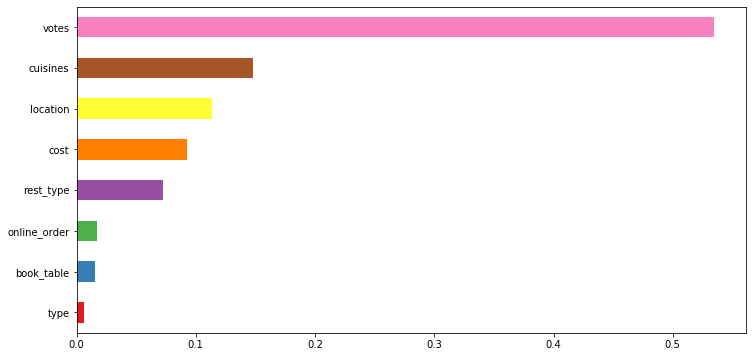

In [87]:
plot_importances(rf, list(X_train))

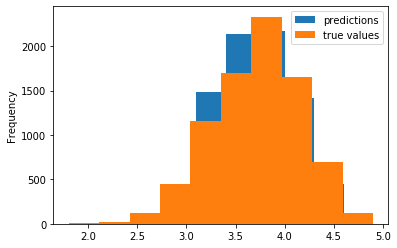

In [88]:
preds_rf = rf.predict(X_test)
pd.Series(preds_rf).plot(kind='hist', label='predictions')
y_test.reset_index(drop=True).plot(kind='hist', label='true values')
plt.legend()

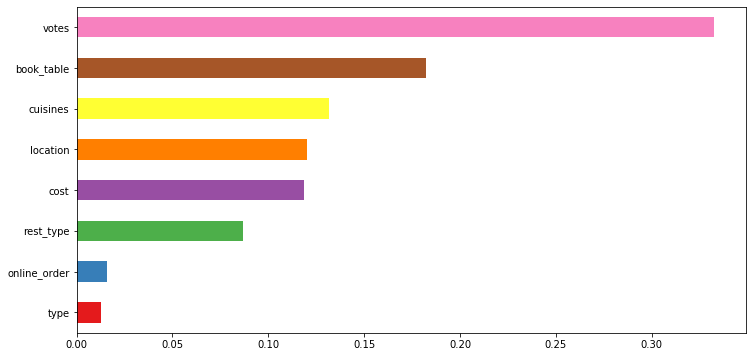

In [89]:
plot_importances(exreg, list(X_train))

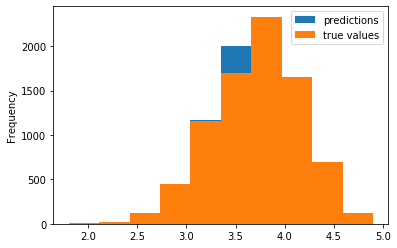

In [90]:
preds_rf = exreg.predict(X_test)
pd.Series(preds_rf).plot(kind='hist', label='predictions')
y_test.reset_index(drop=True).plot(kind='hist', label='true values')
plt.legend()

In [92]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scoring = make_scorer(rmse, greater_is_better=False)

In [94]:
param_grid = {'n_estimators':[20, 50, 100], 'max_features': [None, 'sqrt', 0.5]}
grid_search = GridSearchCV(estimator= rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring=rmse_scoring)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=44,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

In [95]:
grid_search_pred = grid_search.predict(X_test)
score_grid_search = rmse(y_test, grid_search_pred)
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=44, verbose=0, warm_start=False)

In [97]:
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=44, verbose=0, warm_start=False)

rf.fit(X_train, y_train)
pred_model = rf.predict(X_test)
print(f'The R2 Score of {rf.__class__.__name__} is {r2_score(y_test, pred_model)} and rmse score is {np.sqrt(mean_squared_error(y_test, pred_model))}')

The R2 Score of RandomForestRegressor is 0.9355802718374654 and rmse score is 0.11038900222122597


In [101]:
# Checking at different Random State values

N_ITER=10
def run_n_iter(estimator, train, target,test, N_ITER=N_ITER):
    pred_n_iter = np.zeros((y_test.shape[0],), dtype='float')
    for i in range(N_ITER):
        estimator.set_params(random_state= i, )
        estimator.fit(train, target)
        print(estimator.predict(test))
        pred_n_iter += estimator.predict(test) / N_ITER
        print(pred_n_iter)
    return pred_n_iter

pred_n_iter = run_n_iter(rf, X_train, y_train, X_test)
print(f'The RMSE of {N_ITER} iterations is {rmse(y_test, pred_n_iter)}')

[3.7   4.362 3.607 ... 3.3   3.8   3.211]
[0.37   0.4362 0.3607 ... 0.33   0.38   0.3211]
[3.7   4.375 3.585 ... 3.296 3.8   3.213]
[0.74   0.8737 0.7192 ... 0.6596 0.76   0.6424]
[3.7   4.367 3.602 ... 3.3   3.8   3.201]
[1.11   1.3104 1.0794 ... 0.9896 1.14   0.9625]
[3.7   4.365 3.596 ... 3.3   3.8   3.213]
[1.48   1.7469 1.439  ... 1.3196 1.52   1.2838]
[3.7        4.379      3.608      ... 3.29933333 3.8        3.207     ]
[1.85       2.1848     1.7998     ... 1.64953333 1.9        1.6045    ]
[3.7   4.375 3.617 ... 3.301 3.8   3.203]
[2.22       2.6223     2.1615     ... 1.97963333 2.28       1.9248    ]
[3.7   4.379 3.572 ... 3.301 3.8   3.214]
[2.59       3.0602     2.5187     ... 2.30973333 2.66       2.2462    ]
[3.702 4.371 3.607 ... 3.3   3.8   3.181]
[2.9602     3.4973     2.8794     ... 2.63973333 3.04       2.5643    ]
[3.7   4.37  3.619 ... 3.3   3.8   3.206]
[3.3302     3.9343     3.2413     ... 2.96973333 3.42       2.8849    ]
[3.7   4.378 3.596 ... 3.302 3.8   3.187

In [103]:
def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 5, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [round(r2_val_score.mean()*100,2)]
    return score

In [104]:
test_model(rf)

[88.11]

In [105]:
test_model(exreg)

[88.33]

### ___Unseen Prediction___

In [113]:
# training on all data
exreg.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)

In [153]:
zomato_1=pd.read_csv(r"C:\Users\PiyushSin\Downloads\zomato.csv")
zomato_1.drop(columns = ['url','phone','dish_liked'], inplace = True) 
zomato_1.drop_duplicates(inplace=True)

In [154]:
zomato_2 = zomato_1.loc[zomato_1.rate.isnull()]
zomato_3 = zomato_1.loc[zomato_1.rate =='NEW']
zomato_4 = zomato_1.loc[zomato_1.rate =='-']

In [155]:
zomato_2 = zomato_2.append(zomato_3, ignore_index = True)
zomato_2 = zomato_2.append(zomato_4, ignore_index = True)
zomato_2.drop(columns = 'rate', inplace = True)
zomato_2.head()

,address,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,0,Banashankari,Quick Bites,"South Indian, Chinese",100,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari
1,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,0,Banashankari,Delivery,"Bakery, Desserts",500,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari
2,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,0,Banashankari,"Takeaway, Delivery",South Indian,400,[],[],Delivery,Banashankari
3,"625, 5th Cross Road, Hanumanthnagar, Banashank...",Annapooraneshwari Mess,No,No,0,Banashankari,Mess,South Indian,200,[],[],Delivery,Banashankari
4,"1722, 13th Main Road 31st Cross BSK, 2nd Stage...",Coffee Shopee,No,No,0,Banashankari,"Takeaway, Delivery",Beverages,250,[],[],Delivery,Banashankari


In [156]:
zomato_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10036 entries, 0 to 10035
Data columns (total 13 columns):
address                        10036 non-null object
name                           10036 non-null object
online_order                   10036 non-null object
book_table                     10036 non-null object
votes                          10036 non-null int64
location                       10015 non-null object
rest_type                      9958 non-null object
cuisines                       10002 non-null object
approx_cost(for two people)    9937 non-null object
reviews_list                   10036 non-null object
menu_item                      10036 non-null object
listed_in(type)                10036 non-null object
listed_in(city)                10036 non-null object
dtypes: int64(1), object(12)
memory usage: 1019.4+ KB


In [157]:
zomato_2 = zomato_2.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})

zomato_2.dropna(how='any',inplace=True)
zomato_2.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato_2.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato_2['cost'] = zomato_2['cost'].astype(str) #Changing the cost to string
zomato_2['cost'] = zomato_2['cost'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost
zomato_2['cost'] = zomato_2['cost'].astype(int) # Changing the cost to Float

zomato_2.drop(columns = ['address','name','reviews_list','menu_item','city'], inplace = True)

In [161]:
for column in zomato_2.columns[~zomato_2.columns.isin(['cost', 'votes'])]:
    zomato_2[column] = zomato_2[column].factorize()[0]

In [169]:
# approx prediction for new restaurants, this is just an example as there are no votes and it is one of the major feature
exreg.predict(minmax(X)).tolist()

[3.4929999999999954,
 3.386000000000004,
 3.386000000000004,
 3.4800000000000004,
 3.474,
 3.377000000000004,
 3.4800000000000004,
 3.4879999999999955,
 3.3790000000000044,
 3.3840000000000043,
 3.3790000000000044,
 3.4879999999999955,
 3.4879999999999955,
 3.474,
 3.3890000000000042,
 3.377000000000004,
 3.377000000000004,
 3.377000000000004,
 3.4800000000000004,
 3.377000000000004,
 3.377000000000004,
 3.377000000000004,
 3.4800000000000004,
 3.377000000000004,
 3.4800000000000004,
 3.4800000000000004,
 3.377000000000004,
 3.4800000000000004,
 3.4800000000000004,
 3.474,
 3.377000000000004,
 3.3840000000000043,
 3.377000000000004,
 3.377000000000004,
 3.3790000000000044,
 3.377000000000004,
 3.377000000000004,
 3.3890000000000042,
 3.416000000000005,
 3.377000000000004,
 3.377000000000004,
 3.4800000000000004,
 3.377000000000004,
 3.3840000000000043,
 3.4879999999999955,
 3.4800000000000004,
 3.377000000000004,
 3.3890000000000042,
 3.3840000000000043,
 3.377000000000004,
 3.48000000

In [168]:
pd.Series(exreg.predict(minmax(X))).describe()

count    41237.000000
mean         3.421284
std          0.054247
min          3.360000
25%          3.377000
50%          3.379000
75%          3.481000
max          3.497000
dtype: float64